# Import Library

In [ ]:
#import pandas, numpy and matplotlib.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#Train-Test splits and cross validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Plot missing values
import missingno as msno
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.ticker as ticker

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import xgboost as xgb

from scipy.stats import uniform, randint

# Plot missing values
import missingno as msno

# Regular expressions
import re

#Model Metrics and Analysis.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor



# Reading the Dataset

Reading the dataset from thr limk and stroing the same in data frame.

In [ ]:
data=pd.read_csv("https://data.cdc.gov/api/views/7b9s-s8ck/rows.csv")

<ipython-input-2-699609d7747d>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("https://data.cdc.gov/api/views/7b9s-s8ck/rows.csv")


Quick Snapshot of the data. Checking the first five rows of the dataframe.

In [ ]:
data.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


Summary of the dataframe.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770240 entries, 0 to 5770239
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        object 
 1   LocationAbbr                object 
 2   LocationDesc                object 
 3   GeographicLevel             object 
 4   DataSource                  object 
 5   Class                       object 
 6   Topic                       object 
 7   Data_Value                  float64
 8   Data_Value_Unit             object 
 9   Data_Value_Type             object 
 10  Data_Value_Footnote_Symbol  object 
 11  Data_Value_Footnote         object 
 12  Confidence_limit_Low        float64
 13  Confidence_limit_High       float64
 14  StratificationCategory1     object 
 15  Stratification1             object 
 16  StratificationCategory2     object 
 17  Stratification2             object 
 18  StratificationCategory3     object 
 19  Stratification3      

# Data Preprocessing

## Dropping Unwanted Columns

Removing irrelevant columns to simplify the dataset.

In [ ]:
mortality_data=data.drop(['LocationAbbr','Class','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','DataSource','StratificationCategory1','StratificationCategory2','StratificationCategory3','GeographicLevel','Confidence_limit_Low','Confidence_limit_High','LocationID'], axis=1)

## Renaming Columns

Improving the readability of the dataset by renaming the columns names.

In [ ]:
mortality_data=mortality_data.rename(columns={'Stratification1': 'AgeCategory'})
mortality_data=mortality_data.rename(columns={'Stratification2': 'RaceEthnicity'})
mortality_data=mortality_data.rename(columns={'Stratification3': 'Gender'})
mortality_data=mortality_data.rename(columns={'Data_Value': 'MortalityRate'})
mortality_data.columns

Index(['Year', 'LocationDesc', 'Topic', 'MortalityRate', 'AgeCategory',
       'RaceEthnicity', 'Gender'],
      dtype='object')

## Null Values Check

Indentifying null values present in the dataset.  
Checking out for null values in each of the columns.

In [ ]:
mortality_data.isna().sum()

Year                   0
LocationDesc           0
Topic                  0
MortalityRate    2365475
AgeCategory            0
RaceEthnicity          0
Gender                 0
dtype: int64

Checking for null values present in mortality_data dataframe in percentage format.

In [ ]:
mortality_data.isna().mean().round(4)*100

Year              0.00
LocationDesc      0.00
Topic             0.00
MortalityRate    40.99
AgeCategory       0.00
RaceEthnicity     0.00
Gender            0.00
dtype: float64

Checking how the data values missing are distributed in the dataframe for MortalityRate column.

<Axes: >

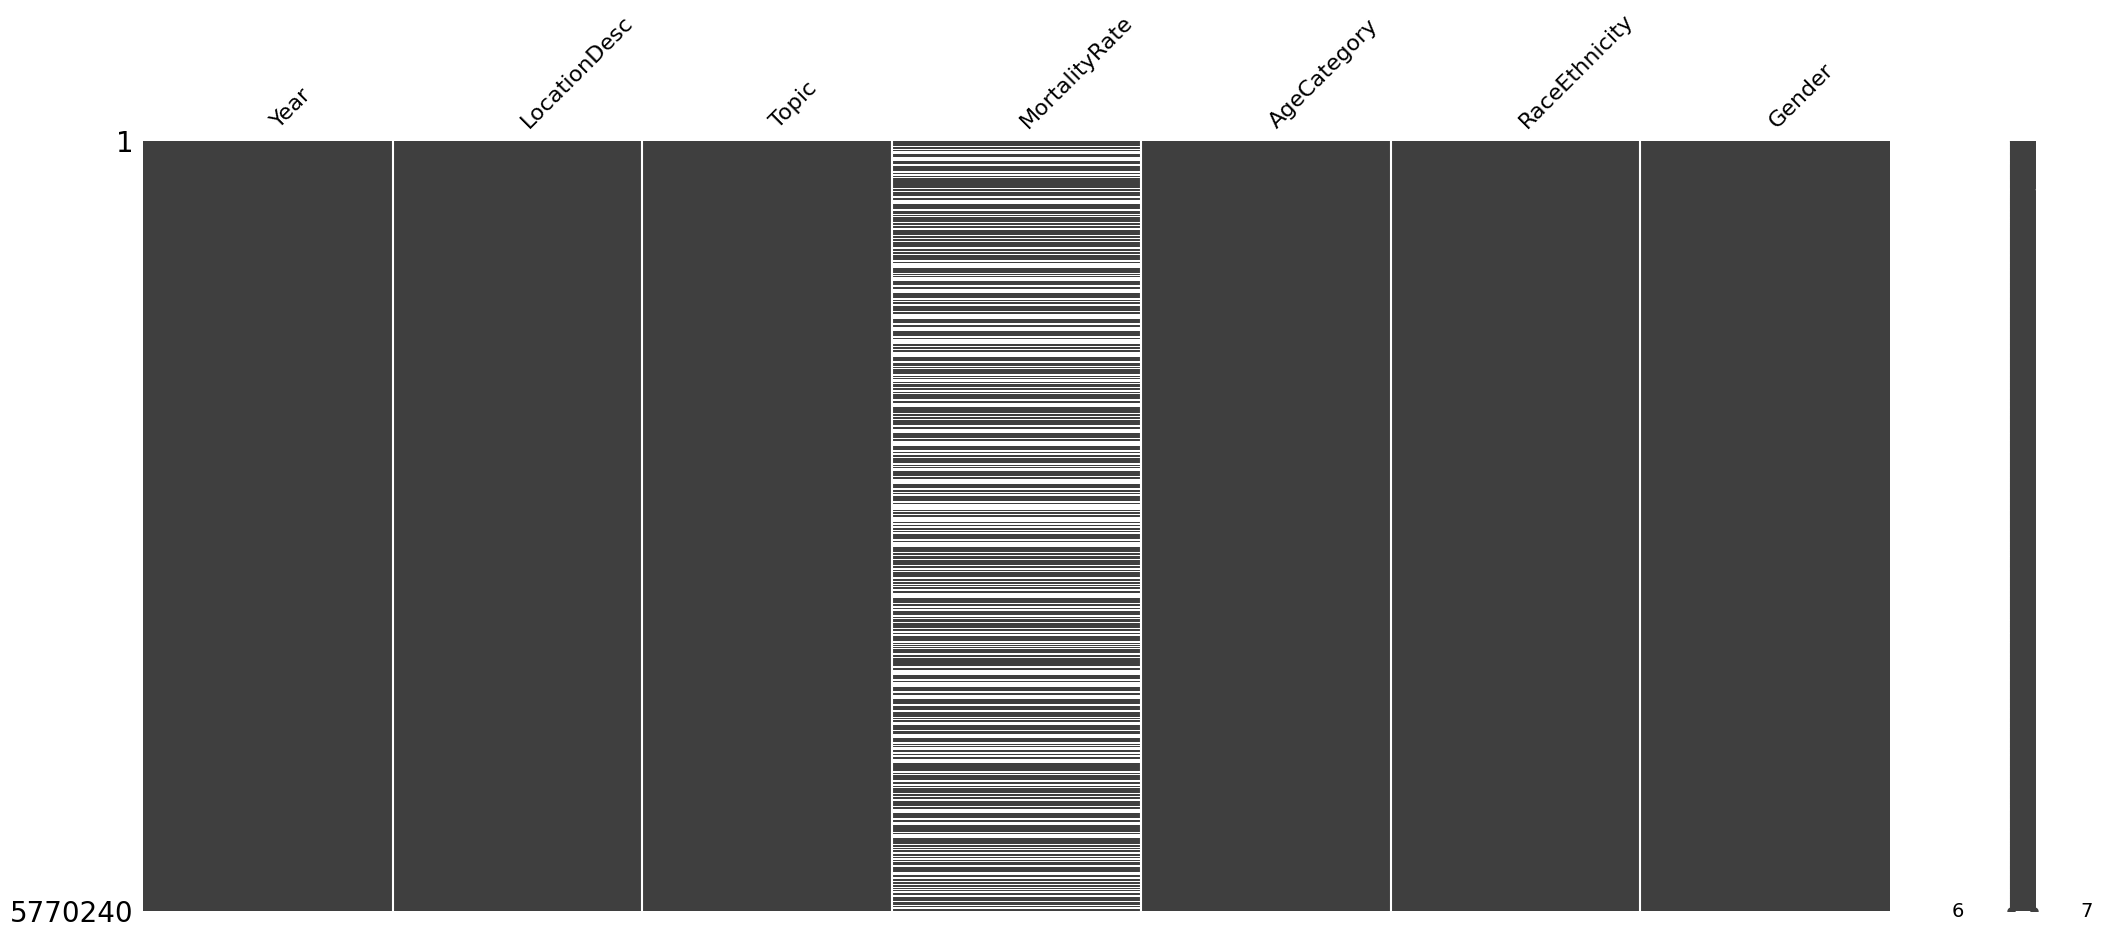

In [ ]:
msno.matrix(mortality_data)

Checking out all the Year values for which we are provided with Mortality Data in United States.

In [ ]:
mortality_data['Year'].unique()

array([1999, 2013, 2014, 2005, 2012, 2010, 2009, 2011, 2007, 2019, 2018,
       2004, 2016, 2015, 2000, 2002, 2003, 2006, 2008, 2001, 2017, '2008',
       '2010', '2014', '2016', '2007', '2000', '2002', '2003', '2005',
       '1999', '2013', '2004', '2001', '2017', '2006', '2009', '2012',
       '2015', '2018', '2019', '2011', '1999 - 2010', '2010 - 2019'],
      dtype=object)

As we can see that there is data present in multiple types and has datatype as object. Also we can see that there are 2 entries of years in the dataset 2010 - 2019 and 1999 - 2010. So dropping all those records as we have the the same data present in individual year entries in the dataset.

In [ ]:
condition = (mortality_data['Year'] == '1999 - 2010') | (mortality_data['Year'] == '2010 - 2019')
mortality_data = mortality_data[~condition]
mortality_data.head()

,Year,LocationDesc,Topic,MortalityRate,AgeCategory,RaceEthnicity,Gender
0,1999,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


## Data Type Conversion

As we seen from the info() output, we can also see that the Year mentioned in various datatypes like int,str. So, updating the 'Year' column values to 'int' type.

In [ ]:
mortality_data_copy = mortality_data.copy()
mortality_data['Year'] = mortality_data['Year'].astype(int)

## Sorting Data

Sorting the data by LocationDesc and then by Year.

In [ ]:
mortality_data = mortality_data.sort_values(by=['LocationDesc', 'Year'])
mortality_data.head()

,Year,LocationDesc,Topic,MortalityRate,AgeCategory,RaceEthnicity,Gender
3880810,1999,Abbeville,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3880846,1999,Abbeville,All stroke,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3880870,1999,Abbeville,Coronary heart disease (CHD),NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3880888,1999,Abbeville,Cardiovascular disease (CVD),NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3880911,1999,Abbeville,Heart failure,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


## Column Names

Converting the column names to camel case so as to make their name as per standards and also increase readability.

In [ ]:
def camel_to_snake(name):
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()
    return re.sub('(.)([0-9][a-z]+)', r'\1_\2', name)

In [ ]:
mortality_data.columns = [camel_to_snake(name) for name in mortality_data.columns]

In [ ]:
mortality_data.columns

Index(['year', 'location_desc', 'topic', 'mortality_rate', 'age_category',
       'race_ethnicity', 'gender'],
      dtype='object')

#Exploratory Data Analysis

## Mean Mortality Rate Year on Year Basis

Calculating and visualizing the Mean Mortality Rate over the year.

In [ ]:
mean_mortality_by_year = mortality_data.groupby('year')['mortality_rate'].mean().reset_index()
mean_mortality_by_year

,year,mortality_rate
0,1999,654.378824
1,2000,637.858300
2,2001,617.989555
3,2002,608.264816
4,2003,589.616238
5,2004,550.562482
6,2005,539.879701
7,2006,508.711408
8,2007,487.687681
9,2008,478.739133


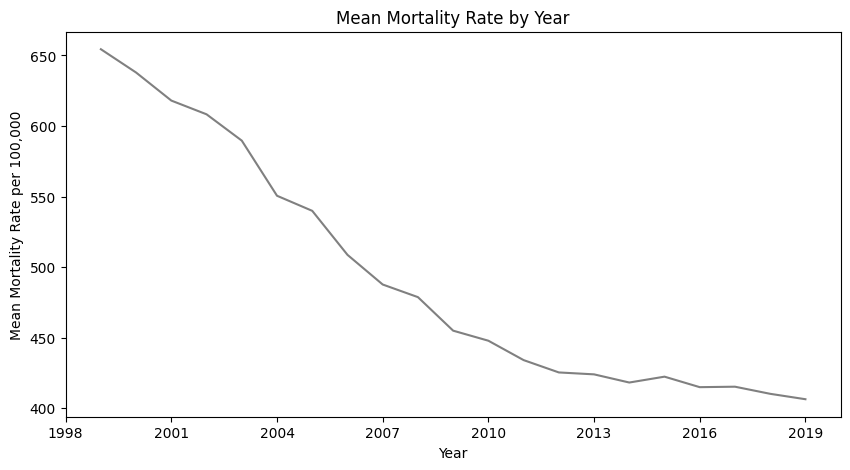

In [ ]:
plt.figure(figsize=(10, 5))

line_plot = sns.lineplot(x='year', y='mortality_rate', data=mean_mortality_by_year, color='grey')

plt.title('Mean Mortality Rate by Year')
plt.xlabel('Year')
plt.ylabel('Mean Mortality Rate per 100,000')
line_plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


plt.show()

Representation :-   
* X-axis (Horizontal Axis) - time with years ranging from 1998 to 2019.
* Y-axis (Vertical Axis) - the mean mortality rate per 100,000 individuals.  
  
There is a clear downward trend in the mortality rate over the period. This could suggest improvements in health outcomes, advancements in medical technology, better healthcare policies or factors contributing to a decrease in mortality.  
  
The sharpness of the decline appears to reduce in later years, with the line becoming fallter after 2013. This could mean that be the rate of improvement in mortality rates has decreased in the recent years.

## Mortality Rate by the Heart Disease types in different years.

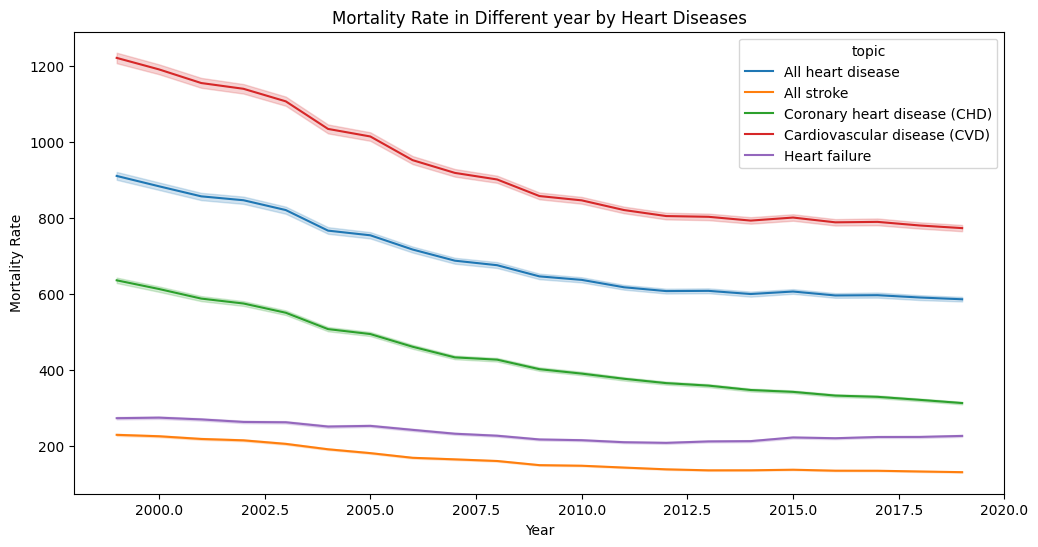

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(mortality_data, x = 'year', y = 'mortality_rate', hue= 'topic')
plt.title("Mortality Rate in Different year by Heart Diseases")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.show()

Representation :-   
* X-Axis (Horizontal) :- Represents the years from 1999 to 2019.
* y-Axis (Vertical) :- Represents the mortality rate per 100,000 individuals.

The mortality for 'Cardiovascular Disease' starts with the highest and remains the highest throughout the period.  
  
The 'All Stroke' starts with the lowest mortality rate and remains the lowest throughout the period.  
  

## Mortality Rate by Age Category

<Axes: xlabel='age_category', ylabel='mortality_rate'>

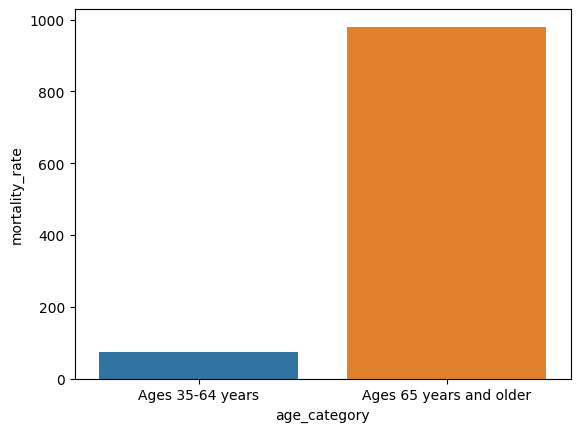

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_category', y='mortality_rate', data=mortality_data)
plt.title('Mortality Rate by Age_Category')
plt.xlabel('Age Category')
plt.ylabel('Mortality Rate per 100,000')
plt.show()

The above bar-plot shows the ditribution of mortality rate per 100,000 for two different age groups 35-64 years and 65+ years due to Heart Disease.

From this plot, we can deduce that :-
* The mortality rate is substantially higher in the older age-group(65 years and older) as compared to younger age group (35-64 years).
* This is consistent with general health data trends where mortality rates increase with age due to a higher prevalence of health conditions, decreased immunity, and other age-related factors.


## Mortality Rate by Gender

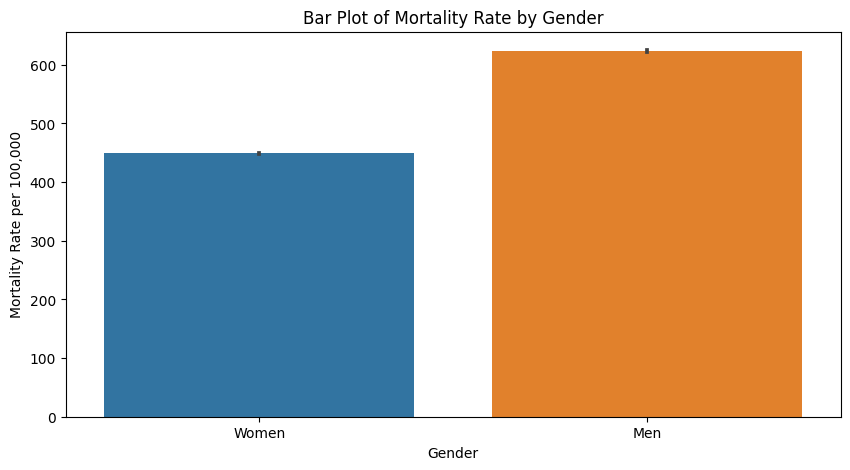

In [ ]:
filtered_data = mortality_data[mortality_data['gender'] != 'Overall']

plt.figure(figsize=(10,5))
sns.barplot(x='gender', y='mortality_rate', data=filtered_data)
plt.title('Bar Plot of Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate per 100,000')
plt.show()

The above bar plot represents mortality rate per 100,000 individuals between two genders women and men.  
* The mortality rate for men is higher than that of women.

Mortality Rate by Race and Ethnicity

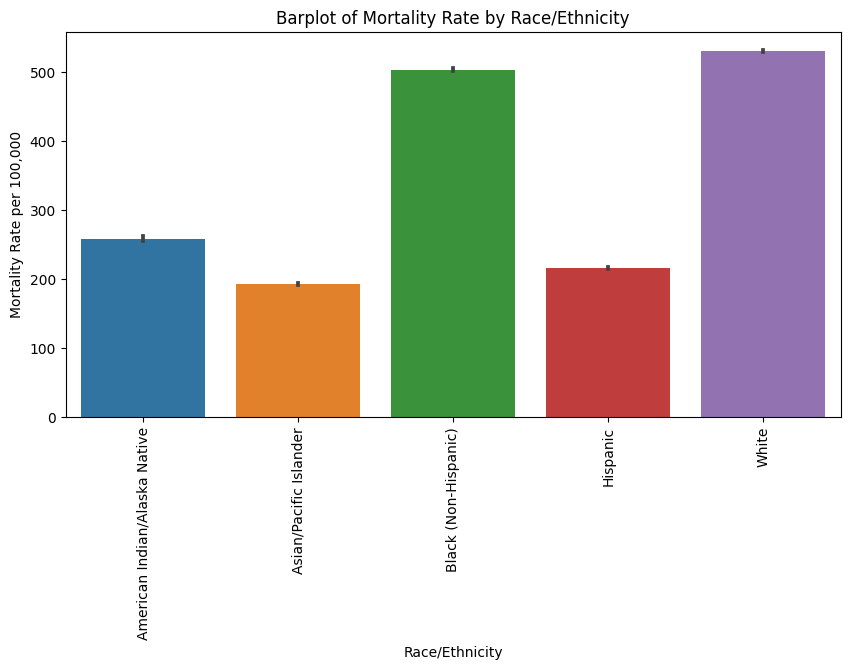

In [ ]:
plt.figure(figsize=(10,5))
filtered_data = mortality_data[mortality_data['race_ethnicity'] != 'Overall']
sns.barplot(x='race_ethnicity', y='mortality_rate', data=filtered_data)

plt.title('Barplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=90)
plt.show()


The above bar-plot represents the mortality accross the different race and ethnicity.  
* The 'White' group have the highest mortality over the period due to heart diseases.
* The 'Asian/Pacific Islander' group have the lowest mortality rate.
* The mortality rates for the 'American Indian/Alaska Native' group are closer to the Hispanic group but lower than the 'Black (Non-Hispanic)' and 'White' groups.

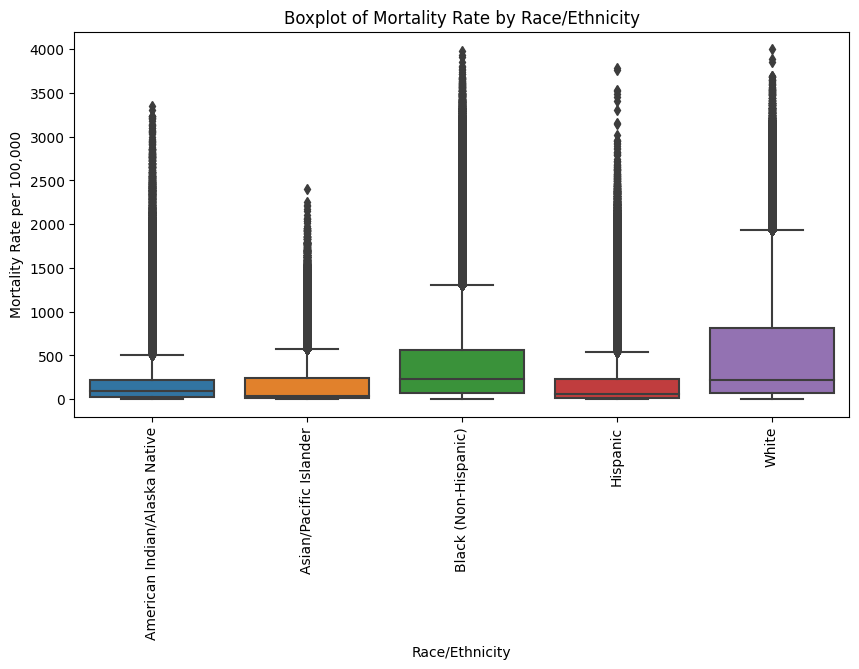

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='race_ethnicity', y='mortality_rate', data=filtered_data)
plt.title('Boxplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=90)
plt.show()


The box plot illustrates differences and variablitiy in mortality rates among different racial/ethic groups.
* The 'Black (Non Hispanic)' group stand out with the highest median and more significant outliers.
* There are outliers accross all groups which suggests that there are speific conditions that experience higher mortality rate.

#Identifying  Missing Values and ReIndexing



## Null Values Check
Checking out the missing/null values in the target columns.

In [ ]:
mortality_data['mortality_rate'].isnull().sum()

2159760

In [ ]:
mortality_data.dropna(subset='mortality_rate', inplace=True)

In [ ]:
mortality_data['mortality_rate'].isnull().sum()

0

Dropped the missing values for the target column and checking for null values again.

## Reindexing

In [ ]:
mortality_data.reset_index(drop=True, inplace=True)

Changed the indexing of the data frame as the data was dropped for null values of mortality rate.

#Dummy Values Creation

Creating dummy values for categorical variables and dropping the first columns of the dummy for each variables.

In [ ]:
df_dummy = pd.get_dummies(mortality_data[['race_ethnicity', 'age_category', 'gender','topic']], drop_first=True)
df_dummy

,race_ethnicity_Asian/Pacific Islander,race_ethnicity_Black (Non-Hispanic),race_ethnicity_Hispanic,race_ethnicity_Overall,race_ethnicity_White,age_category_Ages 65 years and older,gender_Overall,gender_Women,topic_All stroke,topic_Cardiovascular disease (CVD),topic_Coronary heart disease (CHD),topic_Heart failure
3880935,0,0,0,1,0,0,1,0,0,0,0,0
3880953,0,0,0,1,0,0,1,0,1,0,0,0
3880977,0,0,0,1,0,0,1,0,0,0,1,0
3880997,0,0,0,1,0,0,1,0,0,1,0,0
3881017,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4067612,0,0,0,1,0,0,0,0,0,0,0,0
4067631,0,0,0,1,0,0,0,0,1,0,0,0
4067644,0,0,0,1,0,0,0,0,0,0,1,0
4067676,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
mortality_data_before_dummy = mortality_data.copy()

Joining the dummy variable data frame with the main data frame of mortality rate.

In [ ]:
mortality_data = mortality_data.join(df_dummy)
mortality_data

,year,location_desc,topic,mortality_rate,age_category,race_ethnicity,gender,race_ethnicity_Asian/Pacific Islander,race_ethnicity_Black (Non-Hispanic),race_ethnicity_Hispanic,race_ethnicity_Overall,race_ethnicity_White,age_category_Ages 65 years and older,gender_Overall,gender_Women,topic_All stroke,topic_Cardiovascular disease (CVD),topic_Coronary heart disease (CHD),topic_Heart failure
3880935,1999,Abbeville,All heart disease,164.7,Ages 35-64 years,Overall,Overall,0,0,0,1,0,0,1,0,0,0,0,0
3880953,1999,Abbeville,All stroke,30.3,Ages 35-64 years,Overall,Overall,0,0,0,1,0,0,1,0,1,0,0,0
3880977,1999,Abbeville,Coronary heart disease (CHD),98.4,Ages 35-64 years,Overall,Overall,0,0,0,1,0,0,1,0,0,0,1,0
3880997,1999,Abbeville,Cardiovascular disease (CVD),200.1,Ages 35-64 years,Overall,Overall,0,0,0,1,0,0,1,0,0,1,0,0
3881017,1999,Abbeville,Heart failure,22.9,Ages 35-64 years,Overall,Overall,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067612,2019,Ziebach,All heart disease,167.0,Ages 35-64 years,Overall,Men,0,0,0,1,0,0,0,0,0,0,0,0
4067631,2019,Ziebach,All stroke,18.6,Ages 35-64 years,Overall,Men,0,0,0,1,0,0,0,0,1,0,0,0
4067644,2019,Ziebach,Coronary heart disease (CHD),114.3,Ages 35-64 years,Overall,Men,0,0,0,1,0,0,0,0,0,0,1,0
4067676,2019,Ziebach,Cardiovascular disease (CVD),181.8,Ages 35-64 years,Overall,Men,0,0,0,1,0,0,0,0,0,1,0,0


Dropping columns for which we created dummies.

In [ ]:
mortality_data = mortality_data.drop(columns = ['location_desc', 'topic', 'age_category',	'race_ethnicity',	'gender'])

In [ ]:
mortality_data

,year,mortality_rate,race_ethnicity_Asian/Pacific Islander,race_ethnicity_Black (Non-Hispanic),race_ethnicity_Hispanic,race_ethnicity_Overall,race_ethnicity_White,age_category_Ages 65 years and older,gender_Overall,gender_Women,topic_All stroke,topic_Cardiovascular disease (CVD),topic_Coronary heart disease (CHD),topic_Heart failure
3880935,1999,164.7,0,0,0,1,0,0,1,0,0,0,0,0
3880953,1999,30.3,0,0,0,1,0,0,1,0,1,0,0,0
3880977,1999,98.4,0,0,0,1,0,0,1,0,0,0,1,0
3880997,1999,200.1,0,0,0,1,0,0,1,0,0,1,0,0
3881017,1999,22.9,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067612,2019,167.0,0,0,0,1,0,0,0,0,0,0,0,0
4067631,2019,18.6,0,0,0,1,0,0,0,0,1,0,0,0
4067644,2019,114.3,0,0,0,1,0,0,0,0,0,0,1,0
4067676,2019,181.8,0,0,0,1,0,0,0,0,0,1,0,0


#Train Test Split

Splitting the data into two parts as dependant 'y' and independant variables 'X'.

In [ ]:
X = mortality_data.drop(columns = ['mortality_rate'])
y = mortality_data['mortality_rate']

Splitting the X, y into two subsets respectively to get train and test sets for both.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,year,race_ethnicity_Asian/Pacific Islander,race_ethnicity_Black (Non-Hispanic),race_ethnicity_Hispanic,race_ethnicity_Overall,race_ethnicity_White,age_category_Ages 65 years and older,gender_Overall,gender_Women,topic_All stroke,topic_Cardiovascular disease (CVD),topic_Coronary heart disease (CHD),topic_Heart failure
3827580,2008,0,1,0,0,0,0,1,0,0,0,0,0
2677029,2014,0,0,0,0,1,0,1,0,1,0,0,0
3844553,2000,0,0,1,0,0,0,1,0,0,1,0,0
640417,2011,0,0,0,1,0,0,0,0,0,0,0,0
2928482,2004,0,0,0,1,0,0,0,1,1,0,0,0


In [ ]:
y_train.head()

3827580    152.6
2677029     11.9
3844553    186.9
640417     200.2
2928482      9.7
Name: mortality_rate, dtype: float64

In [ ]:
X_test.head()

,year,race_ethnicity_Asian/Pacific Islander,race_ethnicity_Black (Non-Hispanic),race_ethnicity_Hispanic,race_ethnicity_Overall,race_ethnicity_White,age_category_Ages 65 years and older,gender_Overall,gender_Women,topic_All stroke,topic_Cardiovascular disease (CVD),topic_Coronary heart disease (CHD),topic_Heart failure
42408,2016,0,0,0,1,0,0,0,0,0,0,0,1
1954510,1999,0,0,1,0,0,0,1,0,1,0,0,0
1740809,2002,0,0,0,1,0,0,0,0,0,0,0,0
4163404,2012,0,0,0,1,0,0,0,0,0,0,1,0
1332364,2001,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
y_test.head()

42408       27.3
1954510     15.0
1740809    236.5
4163404    156.4
1332364     86.7
Name: mortality_rate, dtype: float64

#Scaling

Scaling the y_train so that the values of y_train are centered around 0 with standard deviation of 1.

In [ ]:
scaler = StandardScaler().fit(y_train.values.reshape(-1, 1))


Applying the scaler to both y_train and y_test to scale the variables values in it.

In [ ]:
y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))

# Replace y_train with its scaled version
y_train = pd.Series(y_train_scaled.flatten(), index=y_train.index)

# Scaling y_test
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Replace y_test with its scaled version
y_test = pd.Series(y_test_scaled.flatten(), index=y_test.index)

## Linear Regreesion

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
#Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('RMSE =',rmse)
print('MSE=',mse)
print('MAE=',mae)

RMSE = 0.5193130500587154
MSE= 0.26968604396128587
MAE= 0.4132082213193756


In [ ]:
r2_score(y_test, y_pred)

0.7297637478142112

Linear Regression Result :-   
* The linear regression model r square value of 0.729 ~ 0.73 means that 73% of the variability in the dependent variable is expalined by this model.  
* This model captures a significant portion of the variance in the data.

## XGB Regressor

In [ ]:
xgb_model = XGBRegressor()

# Parameters can be similar, but ensure they are suitable for regression
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 5),
    "n_estimators": randint(50, 100),
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model,
                            param_distributions=params,
                            n_iter=50,
                            cv=3,
                            verbose=1,
                            n_jobs=-1,
                            return_train_score=True)

search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a627148370>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a627149930>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a627149060>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a627149210>},
                   return_train_score=True, verbose=1)

In [ ]:
search.best_params_

{'colsample_bytree': 0.939946875665814,
 'gamma': 0.28887247648009584,
 'learning_rate': 0.32138189188905075,
 'max_depth': 4,
 'n_estimators': 95,
 'subsample': 0.9412815935835235}

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.939946875665814, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.28887247648009584,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.32138189188905075,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=95, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.939946875665814, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.28887247648009584,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.32138189188905075,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=95, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

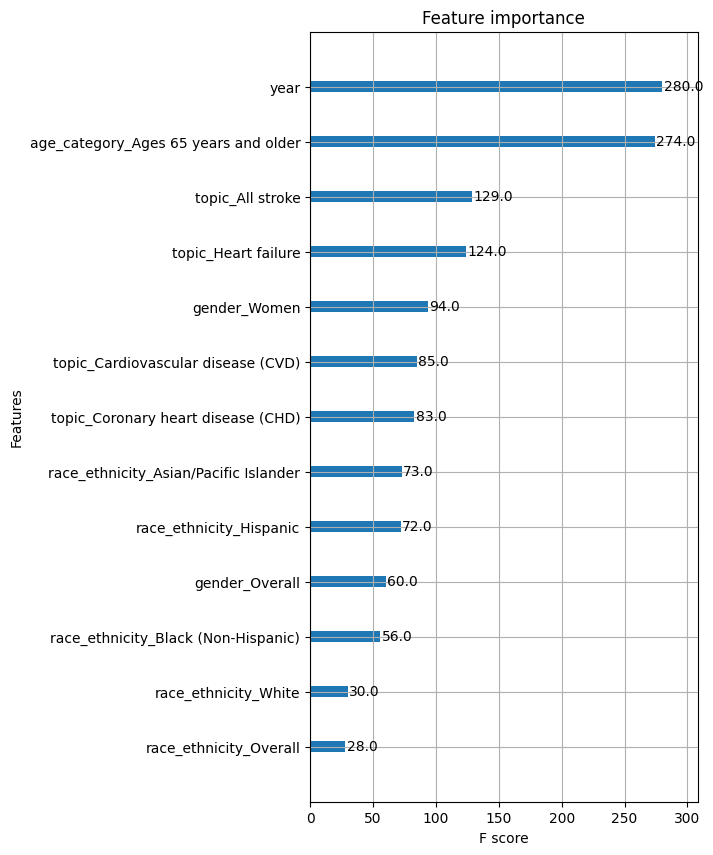

In [ ]:
fig, ax = plt.subplots(figsize = (5,10))
xgb.plot_importance(xgb_model, ax = ax)
plt.show()

In [ ]:
pred_mgb = xgb_model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, pred_mgb)

0.13402161701367554

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred_mgb))
r2 = r2_score(y_test, pred_mgb)

In [ ]:
r2

0.9399011190932576

XGB Model captures a significant portion (94%) of the observed variance in the target variable.

This high score means that the model fits the data well and the predictions mad eby the model are having good accuracy.

